# Step 1 - Choosing a Dataset

### Interests

This files contains the getting started steps to start working with the following datasets

- Finance Data
- NIPS paper datasets
- Jiashun Jin’s data on Coauthorship and Citation Networks for Statisticians
- Co-appearance data in novels: Dream of Red Mansion and Journey to the West
- SNPs Data

### Exploration

Trying to plot the content of the data

#### 1. Finance Data

In [1]:
!mkdir data/
!mkdir data/SNP/
!wget http://math.stanford.edu/~yuany/course/data/snp500.Rda -O data/SNP/snp500.Rda -c

mkdir: data/: File exists
mkdir: data/SNP/: File exists
--2017-10-11 14:41:41--  http://math.stanford.edu/~yuany/course/data/snp500.Rda
Resolving math.stanford.edu... 171.64.38.20
Connecting to math.stanford.edu|171.64.38.20|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import rpy2.robjects as robjects
robjects.r['load']("data/SNP/snp500.Rda")

'Path','stockdata'


In [3]:
robjects.r['stockdata']

R object with classes: ('list',) mapped to:
<ListVector - Python:0x10ab31a88 / R:0x7fa915841f40>
[Matrix, Matrix]
  data: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x10ab31f08 / R:0x10b468000>
[126.750000, 126.270000, 127.190000, 127.070000, ..., 48.100000, 46.320000, 46.140000, 46.690000]
  info: <class 'rpy2.robjects.vectors.Matrix'>
  R object with classes: ('matrix',) mapped to:
<Matrix - Python:0x10ab31f48 / R:0x7fa913b3da00>
['MMM', 'ACE', 'ABT', 'ANF', ..., 'Yahoo In..., 'Yum! Bra..., 'Zimmer H..., 'Zions Ba...]

In [4]:
import numpy as np
np.array(robjects.r['stockdata'])[1][0]

'MMM'

In [5]:
# robjects.r['Path']

In [6]:
np.array(robjects.r['Path'])[0]

R object with classes: ('dgCMatrix',) mapped to:
<RS4 - Python:0x107a72808 / R:0x7fa9135727f0>

In [7]:
robjects.r['Path'][0].__dict__
# What??? RS4 files seems not really python-friendly...

{}

In [8]:
!wget http://math.stanford.edu/~yuany/course/data/snp452-data.mat -O data/SNP/snp452-data.mat -c

--2017-10-11 14:41:45--  http://math.stanford.edu/~yuany/course/data/snp452-data.mat
Resolving math.stanford.edu... 171.64.38.20
Connecting to math.stanford.edu|171.64.38.20|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [9]:
# Load the Matlab file
from scipy.io import loadmat
data = loadmat('data/SNP/snp452-data.mat')
# data

In [10]:
print(data['X'].shape)
data['X']

(1258, 452)


array([[ 126.75,   30.51,   40.05, ...,   25.12,   40.3 ,   40.64],
       [ 126.27,   30.69,   40.44, ...,   24.55,   40.4 ,   40.27],
       [ 127.19,   31.97,   40.7 , ...,   24.99,   40.66,   41.39],
       ..., 
       [  85.4 ,   61.32,   56.98, ...,   37.96,   66.41,   46.32],
       [  85.09,   61.9 ,   57.23, ...,   38.54,   66.45,   46.14],
       [  84.32,   61.78,   56.15, ...,   38.27,   66.15,   46.69]])

In [11]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'stock', 'X'])

In [12]:
print(data['stock'].shape)
data['stock'][0][134]

(1, 452)


array([[ (array(['"DUK"'],
      dtype='<U5'), array(['"Duke Energy"'],
      dtype='<U13'), array(['"Utilities"'],
      dtype='<U11'))]],
      dtype=[('code', 'O'), ('name', 'O'), ('class', 'O')])

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

[[ (array(['"MMM"'],
      dtype='<U5'), array(['"3M Co"'],
      dtype='<U7'), array(['"Industrials"'],
      dtype='<U13'))]]


/Users/xavier/anaconda/envs/py35/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


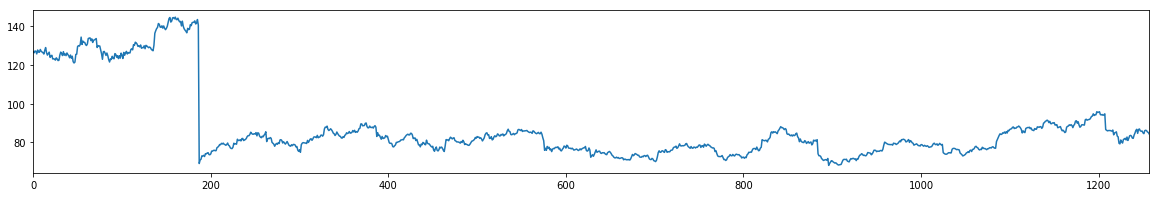

[[ (array(['"ACE"'],
      dtype='<U5'), array(['"ACE Limited"'],
      dtype='<U13'), array(['"Financials"'],
      dtype='<U12'))]]


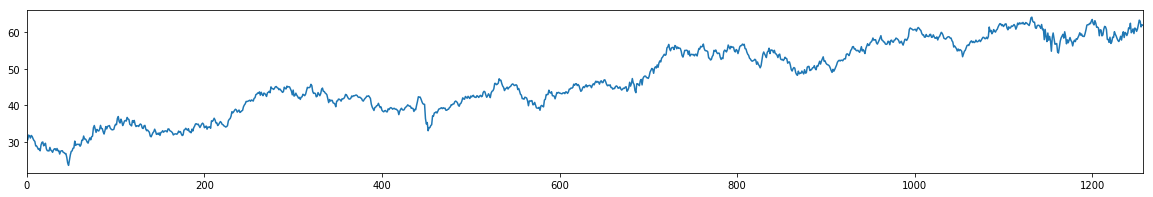

[[ (array(['"ABT"'],
      dtype='<U5'), array(['"Abbott Laboratories"'],
      dtype='<U21'), array(['"Health Care"'],
      dtype='<U13'))]]


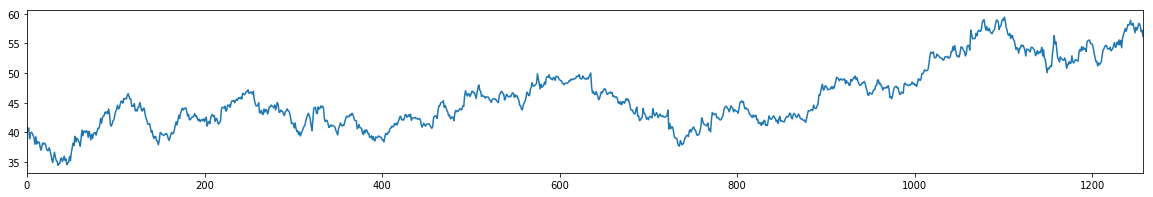

[[ (array(['"ANF"'],
      dtype='<U5'), array(['"Abercrombie & Fitch Company A"'],
      dtype='<U31'), array(['"Consumer Discretionary"'],
      dtype='<U24'))]]


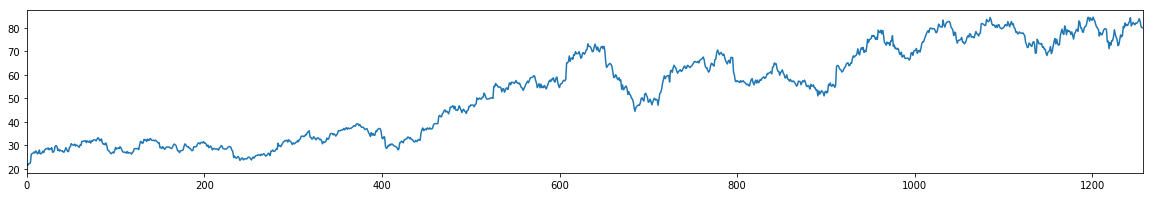

[[ (array(['"ADBE"'],
      dtype='<U6'), array(['"Adobe Systems Inc"'],
      dtype='<U19'), array(['"Information Technology"'],
      dtype='<U24'))]]


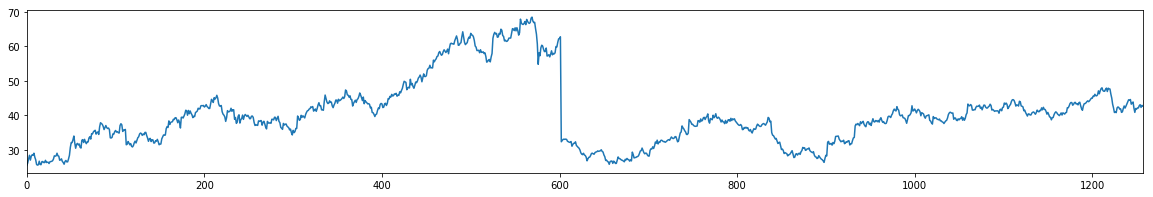

[[ (array(['"AMD"'],
      dtype='<U5'), array(['"Advanced Micro Devices"'],
      dtype='<U24'), array(['"Information Technology"'],
      dtype='<U24'))]]


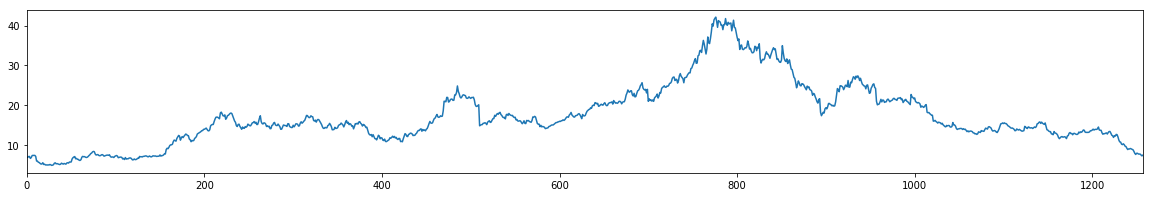

[[ (array(['"AES"'],
      dtype='<U5'), array(['"AES Corp"'],
      dtype='<U10'), array(['"Utilities"'],
      dtype='<U11'))]]


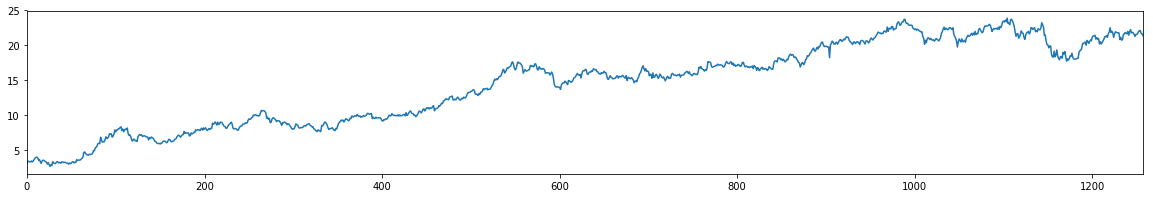

[[ (array(['"AET"'],
      dtype='<U5'), array(['"Aetna Inc"'],
      dtype='<U11'), array(['"Health Care"'],
      dtype='<U13'))]]


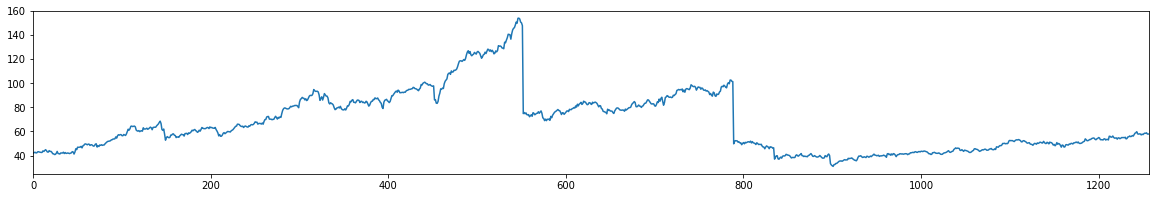

[[ (array(['"AFL"'],
      dtype='<U5'), array(['"AFLAC Inc"'],
      dtype='<U11'), array(['"Financials"'],
      dtype='<U12'))]]


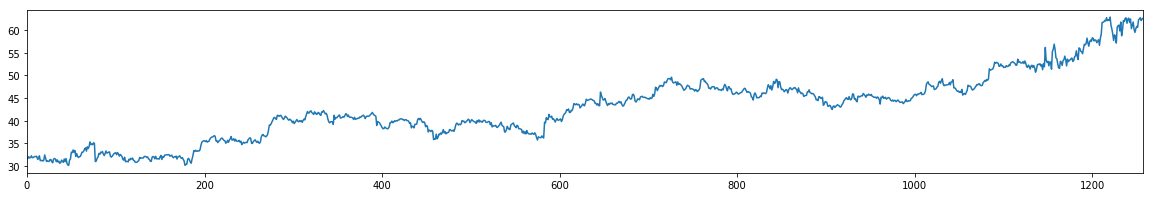

[[ (array(['"A"'],
      dtype='<U3'), array(['"Agilent Technologies Inc"'],
      dtype='<U26'), array(['"Information Technology"'],
      dtype='<U24'))]]


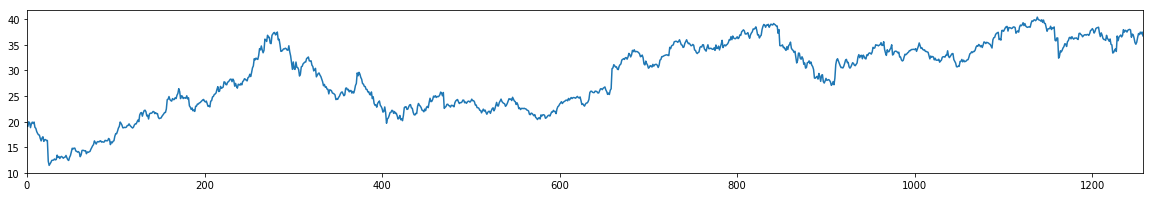

In [14]:
# Plot first 10 stocks prices
for a in range(10):
    print(data['stock'][0][a])
    plt.figure(figsize=(20,3))
    sns.tsplot(data=data['X'].T[a])
    plt.show()

Data doesn't match Google Stock Data...  
For example, `3M Co` stock never went above 120 USD before 2013...
![alt src](3M.png "3M Stock")

Giving up...

### NIPS paper datasets

#### NIPS papers (1987-2016)

In [15]:
! mkdir data/nips

mkdir: data/nips: File exists


In [16]:
# Direct Download doesn't work, requires kaggle CLI...
# !wget https://www.kaggle.com/benhamner/nips-papers/downloads/nips-papers.zip -O data/nips/nips-papers.zip -c

Download [https://www.kaggle.com/benhamner/nips-papers/downloads/nips-papers.zip](https://www.kaggle.com/benhamner/nips-papers/downloads/nips-papers.zip) manually, unzip it and put it in data/nips!

In [17]:
import pandas as pd

In [18]:
pd.read_csv('data/nips/authors.csv')

,id,name
0,1,Hisashi Suzuki
1,10,David Brady
2,100,Santosh S. Venkatesh
3,1000,Charles Fefferman
4,1001,Scott Markel
5,1002,Gregory J. Wolff
6,1003,Timothy W. Cacciatore
7,1004,Paul Sajda
8,1005,Leif H. Finkel
9,1006,Arun K. Jagota


In [19]:
pd.read_csv('data/nips/paper_authors.csv')

,id,paper_id,author_id
0,1,63,94
1,2,80,124
2,3,80,125
3,4,80,126
4,5,80,127
5,6,9,13
6,7,20,33
7,8,20,34
8,9,20,35
9,10,66,99


In [20]:
pd.read_csv('data/nips/papers.csv')

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


Very interesting dataset, especially papers_authors, containing co-author sparse matrix!

#### NIPS words (1987-2015)

In [21]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv -O data/nips/NIPS_1987-2015.csv -c

--2017-10-11 14:42:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/00371/NIPS_1987-2015.csv
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [22]:
pd.read_csv('data/nips/NIPS_1987-2015.csv')

,Unnamed: 0,1987_1,1987_2,1987_3,1987_4,1987_5,1987_6,1987_7,1987_8,1987_9,...,2015_394,2015_395,2015_396,2015_397,2015_398,2015_399,2015_400,2015_401,2015_402,2015_403
0,abalone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbeel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abbott,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abbreviate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,abbreviated,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,abc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,abeles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,abernethy,0,0,0,0,0,0,0,0,0,...,2,0,0,0,12,0,0,0,1,0
8,abilistic,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,abilities,0,1,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


That's a very interesting matrix... designed weirdly!

### Jiashun Jin’s data on Coauthorship and Citation Networks for Statisticians

Again, easier to download manually [http://math.stanford.edu/~yuany/course/data/jiashun/Jiashun.zip](http://math.stanford.edu/~yuany/course/data/jiashun/Jiashun.zip) and extract it to data/

Example of usage : [http://math.stanford.edu/~yuany/course/reference/Libra_Tutorial_springer.pdf](http://math.stanford.edu/~yuany/course/reference/Libra_Tutorial_springer.pdf)

##### Readme from the Dataset:

Data files for the coauthorship and citation networks for statisticians 


2014/10/13


authorList.txt - the list of 3607 author names, sorted alphabetically

In [23]:
authorList = []
with open('data/Jiashun/authorList.txt', 'r') as f:
    for line in f.readlines():
        authorList.append({'name':line.replace('\n','')})
pd.DataFrame.from_dict(authorList)

,name
0,"""A Adam Ding"""
1,"""A B Kristoffersen"""
2,"""A Bottle"""
3,"""A C Davison"""
4,"""A Chatterjee"""
5,"""A D Tsodikov"""
6,"""A David Cummings"""
7,"""A E Ades"""
8,"""A Galichon"""
9,"""A Grane"""


paperDoiList.txt - the list of DOIs for 3248 papers 

In [24]:
paperDoiList = []
with open('data/Jiashun/paperDoiList.txt', 'r') as f:
    for line in f.readlines():
        paperDoiList.append({'DOI':line.replace('\n','')})
pd.DataFrame.from_dict(paperDoiList)

,DOI
0,"""10.1214/12-AOS1008"""
1,"""10.1214/12-AOS1006"""
2,"""10.1214/12-AOS1003"""
3,"""10.1214/12-AOS1000"""
4,"""10.1214/12-AOS995"""
5,"""10.1214/12-AOS1005"""
6,"""10.1214/12-AOS997"""
7,"""10.1214/12-AOS991"""
8,"""10.1214/12-AOS989"""
9,"""10.1214/12-AOS986"""


`authorPaperBiadj.txt` - the 3607x3248 bipartite adjacency matrix for the authors and papers; the element (i,j) is 1 iff author i authored/coauthored paper j, and 0 otherwise; the authors are sorted as in authorList.txt and the papers are sorted as in paperDoiList.txt.

In [25]:
authorPaperBiadj = np.loadtxt('data/Jiashun/authorPaperBiadj.txt')
print(authorPaperBiadj.shape)
authorPaperBiadj

(3607, 3248)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

`paperCitAdj.txt` - the 3248x3248 asymmetric adjacency matrix for citations between the papers; the element (i,j) is 1 iff paper i cites paper j.

In [26]:
paperCitAdj = np.loadtxt('data/Jiashun/paperCitAdj.txt')
print(paperCitAdj.shape)
paperCitAdj

(3248, 3248)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In the folder of "coauthorship":

- authorListCoauthorGiant.txt  - list of 2263 authors in the giant component of the coauthorship network; sorted alphabetically

- authorListCoauthorThreshGiant.txt - list of 236 authors in the giant component of the coauthorship network where each edge denotes at least t=2 papers coauthored

- coauthorAdj.txt - 3607x3607 adjacency matrix of the coauthorship network

- coauthorAdjGiant.txt - 2263x2263 adjacency matrix of the giant component of the coauthorship network where each edge denotes at least t=1 paper coauthored.

- coauthorAdjThreshGiant.txt -  236x236 adjacency matrix of the giant component of the coauthorship network where each edge denotes at least t=2 papers coauthored  

In [27]:
authorListCoauthorGiant = []
with open('data/Jiashun/coauthorship/authorListCoauthorGiant.txt', 'r') as f:
    for line in f.readlines():
        authorListCoauthorGiant.append({'name':line.replace('\n','')})
pd.DataFrame.from_dict(authorListCoauthorGiant)

,name
0,"""A B Kristoffersen"""
1,"""A C Davison"""
2,"""A Chatterjee"""
3,"""A D Tsodikov"""
4,"""A Galichon"""
5,"""A Guillin"""
6,"""A H Zwinderman"""
7,"""A J Hayter"""
8,"""A J Lee"""
9,"""A J Scott"""


In [28]:
authorListCoauthorThreshGiant = []
with open('data/Jiashun/coauthorship/authorListCoauthorThreshGiant.txt', 'r') as f:
    for line in f.readlines():
        authorListCoauthorThreshGiant.append({'name':line.replace('\n','')})
pd.DataFrame.from_dict(authorListCoauthorThreshGiant)

,name
0,"""Abel Rodriguez"""
1,"""Alan E Gelfand"""
2,"""Alexander Meister"""
3,"""Amnon Neeman"""
4,"""Amy H Herring"""
5,"""Anastasios A Tsiatis"""
6,"""Andrew O Finley"""
7,"""Anirban Bhattacharya"""
8,"""Anna Maria Siega-Riz"""
9,"""Annie Qu"""


In [29]:
coauthorAdj = np.loadtxt('data/Jiashun/coauthorship/coauthorAdj.txt')
print(coauthorAdj.shape)
coauthorAdj

(3607, 3607)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [30]:
coauthorAdjGiant = np.loadtxt('data/Jiashun/coauthorship/coauthorAdjGiant.txt')
print(coauthorAdjGiant.shape)
coauthorAdjGiant

(2263, 2263)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [31]:
coauthorAdjThreshGiant = np.loadtxt('data/Jiashun/coauthorship/coauthorAdjThreshGiant.txt')
print(coauthorAdj.shape)
coauthorAdjThreshGiant

(3607, 3607)


array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In the folder of "citation":

- authorCitAdj.txt - 3607x3607 adjacency matrix for the citations between authors; the element (i,j) is 1 iff author i cites author j at least once

- authorCitAdjGiant.txt - 2654x2654 adjacency matrix for the weakly connected giant component of the citation network of authors; a submatrix of authorCitAdj.txt

- authorListCitGiant.txt - list of 2654 authors in the weakly connected giant component of the citation network of authors; sorted alphabetically

In [32]:
authorCitAdj = np.loadtxt('data/Jiashun/citation/authorCitAdj.txt')
print(authorCitAdj.shape)
authorCitAdj

(3607, 3607)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
authorCitAdjGiant = np.loadtxt('data/Jiashun/citation/authorCitAdjGiant.txt')
print(authorCitAdjGiant.shape)
authorCitAdjGiant

(2654, 2654)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [34]:
authorListCitGiant = []
with open('data/Jiashun/citation/authorListCitGiant.txt', 'r') as f:
    for line in f.readlines():
        authorListCitGiant.append({'name':line.replace('\n','')})
pd.DataFrame.from_dict(authorListCitGiant)

,name
0,"""A Adam Ding"""
1,"""A C Davison"""
2,"""A Chatterjee"""
3,"""A D Tsodikov"""
4,"""A Galichon"""
5,"""A Guillin"""
6,"""A H Zwinderman"""
7,"""A J Hayter"""
8,"""A J Lee"""
9,"""A J Scott"""



### Co-appearance data in novels: Dream of Red Mansion and Jour- ney to the West

In [35]:
!mkdir data/novel

mkdir: data/novel: File exists


In [36]:
!wget http://math.stanford.edu/~yuany/course/data/dream.RData -O data/novel/dream.RData -c

--2017-10-11 14:43:55--  http://math.stanford.edu/~yuany/course/data/dream.RData
Resolving math.stanford.edu... 171.64.38.20
Connecting to math.stanford.edu|171.64.38.20|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [37]:
import rpy2.robjects as robjects
robjects.r['load']("data/novel/dream.RData")

'dream'


In [38]:
data = robjects.r['dream']
data

chap80,贾演,贾源,...,李二,张三,吴良
1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000
0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000


In [39]:
data.names

'chap80','贾演','贾源','贾代化',...,'张王氏','李二','张三','吴良'


In [40]:
data_array = []
for i in range(data.ncol):
    row = []
    for j in range(data.nrow):
        row.append(int(data[i][j]))
    data_array.append(row)
np.array(data_array)

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
data_dict = []
for index,name in enumerate(data.names):
    current = {}
    current['_name'] = name
    for j in range(data.nrow):
        current['appears_in_scene_'+str(j+1).zfill(3)] = data_array[index][j]
    data_dict.append(current)
pd.DataFrame.from_dict(data_dict)

,_name,appears_in_scene_001,appears_in_scene_002,appears_in_scene_003,appears_in_scene_004,appears_in_scene_005,appears_in_scene_006,appears_in_scene_007,appears_in_scene_008,appears_in_scene_009,...,appears_in_scene_466,appears_in_scene_467,appears_in_scene_468,appears_in_scene_469,appears_in_scene_470,appears_in_scene_471,appears_in_scene_472,appears_in_scene_473,appears_in_scene_474,appears_in_scene_475
0,chap80,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,贾演,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,贾源,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,贾代化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,贾代善,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,贾代儒,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,贾代修,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,贾敷,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,贾敬,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,贾赦,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Column 1 is the indicator of early 80 chapters believed to be composed by CAO, Xueqin, while later 40 chapters attributed to GAO, E.

### SNP Data - Be careful! 2GB!

In [42]:
!mkdir data/genes

mkdir: data/genes: File exists


In [43]:
!wget http://math.stanford.edu/~yuany/course/ceph_hgdp_minor_code_XNA.txt.zip -O data/genes/ceph_hgdp_minor_code_XNA.txt.zip -c

--2017-10-11 14:44:00--  http://math.stanford.edu/~yuany/course/ceph_hgdp_minor_code_XNA.txt.zip
Resolving math.stanford.edu... 171.64.38.20
Connecting to math.stanford.edu|171.64.38.20|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [44]:
!unzip -n data/genes/ceph_hgdp_minor_code_XNA.txt.zip -d data/genes/

Archive:  data/genes/ceph_hgdp_minor_code_XNA.txt.zip


In [45]:
lines = []
with open('data/genes/ceph_hgdp_minor_code_XNA.txt', 'r') as f:
    for line in f.readlines():
        lines.append({'sequence':line.replace('\n','')})

In [46]:
import pandas as pd
pd.DataFrame.from_dict(lines)

,sequence
0,1 0 0 0 0 1 0 1 0 0 2 1 2 2 0 0 1 0 0 0 1 0 2 ...
1,2 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 ...
2,1 0 0 1 2 0 2 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 ...
3,1 0 2 1 1 0 1 1 0 0 1 0 2 2 0 0 0 0 0 1 0 2 1 ...
4,2 0 0 1 1 1 1 1 1 0 1 1 2 2 0 0 0 0 1 1 0 1 1 ...
5,2 0 0 0 0 1 0 1 0 0 1 1 2 2 0 0 0 0 2 2 0 2 2 ...
6,2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 ...
7,0 1 0 1 1 1 1 1 0 0 1 1 2 2 0 0 0 0 0 0 0 0 2 ...
8,2 0 0 0 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 ...
9,2 0 1 2 0 0 1 2 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 ...


In [47]:
# lines[0]